In [1]:
using ControlSystems
using DSP
using PyPlot

include("help_fcns.jl")
include("IterativeLearningControl.jl")
include("PyControlPlots.jl")

┌ Info: Precompiling ControlSystems [a6e380b2-a6ca-5380-bf3e-84a91bcd477e]
└ @ Base loading.jl:1278


Main.PyControlPlots

In [6]:
h = 1e-7
γ = 2π*12e3
τ = 1e-6
P = c2d(DemoSystems.fotd(;T=1/γ, τ=τ), h);

In [8]:
pi_params = amigo_pi_design(1/γ, τ, 1)

C = c2d(pi_ss(pi_params[1], pi_params[2], 1/(2π*2e6)), h)[1];

In [9]:
Ω = 2π*logspace(2, 6.3, 200)

C_fr = freqresp(C, Ω)[:]
P_fr = freqresp(P, Ω)[:]
L_fr = freqresp(P*C, Ω)[:];

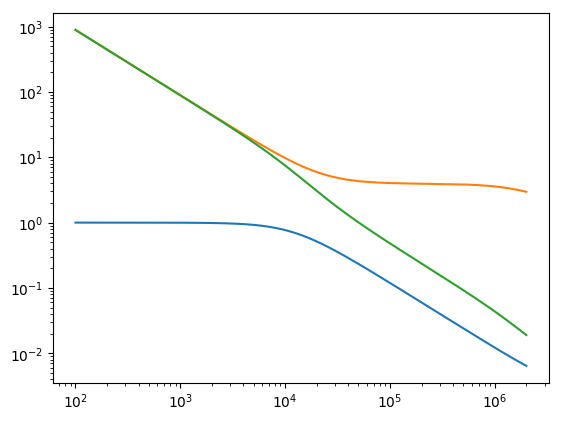

In [5]:
loglog(Ω/2π, abs.(P_fr))
loglog(Ω/2π, abs.(C_fr))
loglog(Ω/2π, abs.(L_fr))
show(block=false)

In [ ]:
u_ILC = zeros(size(r))

e = zeros(length(t))

y_hist = zeros(length(t), N_iters)
u_hist = zeros(length(t), N_iters)
